## Lab 2 Template

zID: z5298319

Name: TONG ZHE

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [1]:
import math
import numpy as np
import sys

import cv2
import matplotlib.pyplot as plt

In [2]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [3]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [4]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Beehive_Corner_Adelaide.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

In [5]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)
img = cv2.imread('Beehive_Corner_Adelaide.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img)

In [6]:
sift = SiftDetector()

kps, des = sift.detector.detectAndCompute(img, None)
print(len(kps))

sift_img1 = cv2.drawKeypoints(img, kps, np.array([]))
#plt.imshow(sift_img1)

3656


365


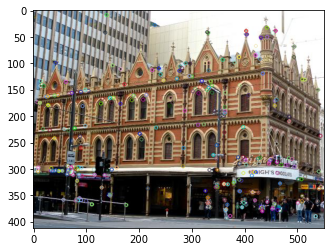

In [7]:
#change number of n_features image a):
new_params = {"n_features": 365,"n_octave_layers": 3,"contrast_threshold": 0.03, "edge_threshold": 10, "sigma": 1.6}
sift_2a = SiftDetector(params=new_params)

kps_2a, des_2a = sift_2a.detector.detectAndCompute(img, None)
print(len(kps_2a))

sift_img2a = cv2.drawKeypoints(img, kps_2a, np.array([]))
plt.imshow(sift_img2a)
#plt.savefig('1(a).png')

364


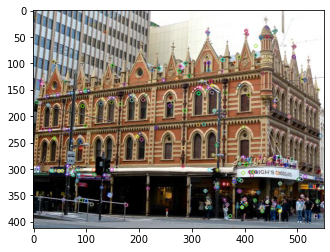

In [8]:
#change number of contrast_threshold image b):
new_params = {"n_features": 0,"n_octave_layers": 3,"contrast_threshold": 0.1622, "edge_threshold": 10, "sigma": 1.6}
sift_2b = SiftDetector(params=new_params)

kps_2b, des_2b = sift_2b.detector.detectAndCompute(img, None)
print(len(kps_2b))

sift_img2b = cv2.drawKeypoints(img, kps_2b, np.array([]))
plt.imshow(sift_img2b)
#plt.savefig('1(b).png')

### Question: describe in your Jupyter notebook the approach you used for b).

Change the value of contrast_threshold until the result become 10% of origin data.

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


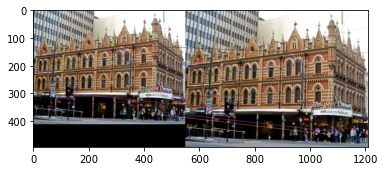

In [9]:
# Write your code here and display images obtained in 2(b) and 2(d).Also, write your answer to 2(c) in a new cell.
row, col, n = img.shape
resize_img = cv2.resize(img, (int(col * 1.2), int(row * 1.2)))
#plt.imshow(resize_img)

#compute
resize_kps, resize_des = sift_2b.detector.detectAndCompute(resize_img, None)
#print(len(resize_kps))

sift_resize_img1 = cv2.drawKeypoints(resize_img, resize_kps, np.array([]))
plt.imshow(sift_resize_img1)
#plt.savefig('2(b).png')

# connect the points
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, resize_des, k=2)

fit_points = {}

for m, n in matches:
    if m.distance < 0.1 * n.distance:
        fit_points.update({m:m.distance})
temp = sorted(fit_points.items(), key=lambda item:item[1])


five_points = []
count = 0
for i in temp:
    if count<6:
        count+=1
        five_points.append([i[0]])

        
result = cv2.drawMatchesKnn(sift_img2b, kps, sift_resize_img1, resize_kps, five_points, None, flags=2)

plt.imshow(result)
#plt.savefig('2(d).png')

### Question: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?

The scaled image is roughly the sameas those of the original image. It imply that it has scale invariance.

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 60 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

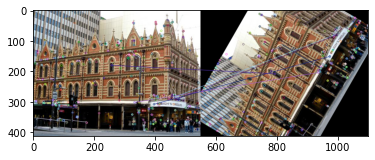

In [10]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.
img_center = get_img_center(img)

angle = 60
rotate_img = rotate(img, img_center[1], img_center[0], angle)
#plt.imshow(rotate_img)

#compute
rotate_kps, rotate_des = sift_2b.detector.detectAndCompute(rotate_img, None)
#print(len(rotate_kps))

sift_rotate_img1 = cv2.drawKeypoints(rotate_img, rotate_kps, np.array([]))
plt.imshow(sift_rotate_img1)
#plt.savefig('3(b).png')

# connect the points
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, rotate_des, k=2)

fit_points = {}

for m, n in matches:
    if m.distance < 0.1 * n.distance:
        fit_points.update({m:m.distance})
temp = sorted(fit_points.items(), key=lambda item:item[1])


five_points = []
count = 0
for i in temp:
    if count<6:
        count+=1
        five_points.append([i[0]])

        
result = cv2.drawMatchesKnn(sift_img2b, kps, sift_rotate_img1, rotate_kps, five_points, None, flags=2)

plt.imshow(result)
#plt.savefig('3(d).png')

### Question : Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?

The rotated image is roughly the same as those of the original image. It also imply that it has scale invariance.